In [1]:
import wandb
from tqdm import tqdm
import pandas as pd
import pickle
api = wandb.Api(timeout=100)



In [2]:
import json
import os
import sys
sys.path.append('/home/yhc/projects/dcd')

from envs.iphyre.adversarial import load_vlm_gen_tasks_solvable


task_suite_path = {
    "Iphyre-HandDesign-v0": "../../../iphyre/test_toy20250110/20250525/output_hand_test",
    "Iphyre-ProceduralShift-v0": "../../../iphyre/test_toy20250110/20250602/output_eval_shift",
    "Iphyre-ProceduralRotate-v0": "../../../iphyre/test_toy20250110/20250602/output_eval_rotate",
    "Iphyre-VLMGeneratedShift-v0": "../../../iphyre/test_toy20250110/20250427/output_shift",
    "Iphyre-VLMGeneratedRotate-v0": "../../../iphyre/test_toy20250110/20250427/output_rotate",
}

metrics = []

suite_metrics = {}

bad_suite_metrics = {}

for suite_name, suit_path in task_suite_path.items():
    env_names, task_dict = load_vlm_gen_tasks_solvable(
        task_dir_list=[suit_path],
        should_check_solvable=True if 'VLM' in suite_name or 'Procedural' in suite_name else False
    )

    count = 0
    for env_name in env_names:
        # print(task_dict[env_name])

        full_env_name = f'{suite_name}/{env_name}/success_rate'
        metrics.append(full_env_name)
        if suite_name not in suite_metrics:
            suite_metrics[suite_name] = []
        suite_metrics[suite_name].append(full_env_name)
        count += 1
    print(f'{suite_name} has {count} envs')

    metrics.append(f'{suite_name}/mean_success_rate')

    env_names, task_dict = load_vlm_gen_tasks_solvable(
        task_dir_list=[suit_path],
        should_check_solvable=False
    )

    bad_suite_metrics[suite_name] = env_names
    print(f'BAD {suite_name} has {len(env_names)} envs')


raw_data = {metric: {} for metric in metrics}

print(metrics)

/home/yhc/miniconda3/envs/dred/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pygame 2.6.1 (SDL 2.28.4, Python 3.8.20)
Hello from the pygame community. https://www.pygame.org/contribute.html
Generated task used count: 15
Iphyre-HandDesign-v0 has 15 envs
Generated task used count: 15
BAD Iphyre-HandDesign-v0 has 15 envs
Generated task used count: 100
Iphyre-ProceduralShift-v0 has 100 envs
Generated task used count: 100
BAD Iphyre-ProceduralShift-v0 has 100 envs
Generated task used count: 100
Iphyre-ProceduralRotate-v0 has 100 envs
Generated task used count: 100
BAD Iphyre-ProceduralRotate-v0 has 100 envs
Generated task used count: 88
Iphyre-VLMGeneratedShift-v0 has 88 envs
Generated task used count: 98
BAD Iphyre-VLMGeneratedShift-v0 has 98 envs
Generated task used count: 80
Iphyre-VLMGeneratedRotate-v0 has 80 envs
Generated task used count: 98
BAD Iphyre-VLMGeneratedRotate-v0 has 98 envs
['Iphyre-HandDesign-v0/hole_double/success_rate', 'Iphyre-HandDesign-v0/hole_high_gap/success_rate', 'Iphyre-HandDesign-v0/hole_outside/success_rate', 'Iphyre-HandDesign-v0/hole

In [4]:
import os

print(f"Fetching data...")
runs = api.runs(
    path="yqkqknct/dcd", 
    filters={"config.exp_name": {"$in": ["ued_iphyre_all_reproduce_0622"]}}
)
print(f"Found {len(runs)} runs")

# Create directory for run data if it doesn't exist
os.makedirs("run_data", exist_ok=True)

# Process each run
for run in tqdm(runs):
    run_id = run.id
    method = run.config.get('method')
    seed = run.config.get('seed')

    run_file = f"run_data/{method}-{run_id}.pkl"
    
    # Skip if run data already exists
    # if os.path.exists(run_file):
    #     print(f"Skipping {run_id}, already processed")
    #     continue
        
    print(f"Processing {run_id}")
    print(f"Run state: {run.state}")
    print(f"Run name: {run.name}")
    print(f"Run method: {method}")

    if seed != 88 and seed != 89 and seed != 90:
        print(f'skipping {run_id} with seed {seed}')
        continue
    
    # Get run data

    run_data = {
        'name': run.name,
        'method': method,
        'metrics': {}
    }
    # print(['global_step', *metrics])
    # Get history for each metric
    history = run.history(keys=['global_step', *metrics])
    # print(history)
    for m in metrics:
        run_data['metrics'][m] = history[['global_step', m]]
        
    # Save run data
    with open(run_file, 'wb') as f:
        pickle.dump(run_data, f)

        

Fetching data...
Found 51 runs


  0%|          | 0/51 [00:00<?, ?it/s]

Processing 0yv2h09t
Run state: failed
Run name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_2_20250622-052619_312
Run method: Iphyre-DR


  2%|▏         | 1/51 [00:01<00:50,  1.02s/it]

Processing 96wc30mn
Run state: failed
Run name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_1_20250622-052619_684
Run method: Iphyre-DR


  4%|▍         | 2/51 [00:02<00:53,  1.09s/it]

Processing psqvn1hb
Run state: failed
Run name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250622-052619_13
Run method: Iphyre-DR


  6%|▌         | 3/51 [00:02<00:46,  1.03it/s]

Processing 5xi5g4qi
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_0_20250622-052706_757
Run method: Iphyre-Robust-PLR


  8%|▊         | 4/51 [00:03<00:46,  1.02it/s]

Processing 8jh6oyd8
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_2_20250622-052706_985
Run method: Iphyre-Robust-PLR


 10%|▉         | 5/51 [00:04<00:45,  1.01it/s]

Processing hseto6be
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_1_20250622-052706_622
Run method: Iphyre-Robust-PLR


 12%|█▏        | 6/51 [00:05<00:42,  1.05it/s]

Processing mm16zvuf
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_0_20250622-052825_594
Run method: Iphyre-V-Robust-PLR


 14%|█▎        | 7/51 [00:06<00:39,  1.12it/s]

Processing sk54aoaz
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_2_20250622-052825_992
Run method: Iphyre-V-Robust-PLR


 16%|█▌        | 8/51 [00:07<00:36,  1.17it/s]

Processing vvpuqf1d
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_1_20250622-052825_990
Run method: Iphyre-V-Robust-PLR


 18%|█▊        | 9/51 [00:08<00:36,  1.16it/s]

Processing 711p50yw
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.9-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-editor1.0-random-n1-baseeasy-tl_0_20250622-052830_260
Run method: Iphyre-V-Accel


 20%|█▉        | 10/51 [00:09<00:36,  1.13it/s]

Processing i6rm64de
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.9-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-editor1.0-random-n1-baseeasy-tl_2_20250622-052830_543
Run method: Iphyre-V-Accel


 22%|██▏       | 11/51 [00:10<00:34,  1.15it/s]

Processing rutdmf7m
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.9-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-editor1.0-random-n1-baseeasy-tl_1_20250622-052830_680
Run method: Iphyre-V-Accel


 24%|██▎       | 12/51 [00:10<00:34,  1.14it/s]

Processing hbmdr7za
Run state: failed
Run name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_1_20250622-053243_140
Run method: Iphyre-V-Uniform


 25%|██▌       | 13/51 [00:11<00:32,  1.17it/s]

Processing qc648sae
Run state: failed
Run name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250622-053243_365
Run method: Iphyre-V-Uniform


 27%|██▋       | 14/51 [00:12<00:31,  1.18it/s]

Processing r5rhoxi2
Run state: failed
Run name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_2_20250622-053243_405
Run method: Iphyre-V-Uniform


 29%|██▉       | 15/51 [00:13<00:31,  1.15it/s]

Processing 5nxy1g7i
Run state: failed
Run name: ued--sfl-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_2_20250622-133952_988
Run method: Iphyre-V-SFL


 31%|███▏      | 16/51 [00:14<00:31,  1.13it/s]

Processing 6gydu8zf
Run state: failed
Run name: ued--sfl-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_1_20250622-133952_913
Run method: Iphyre-V-SFL


 33%|███▎      | 17/51 [00:15<00:30,  1.11it/s]

Processing 5o4xsxmz
Run state: failed
Run name: ued--sfl-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250622-133953_120
Run method: Iphyre-V-SFL


 35%|███▌      | 18/51 [00:16<00:30,  1.07it/s]

Processing 7h98gz3d
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.9-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-editor1.0-random-n1-baseeasy-tl_1_20250622-062233_318
Run method: Iphyre-Accel


 37%|███▋      | 19/51 [00:17<00:29,  1.10it/s]

Processing gm004vj8
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.9-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-editor1.0-random-n1-baseeasy-tl_2_20250622-062233_806
Run method: Iphyre-Accel


 39%|███▉      | 20/51 [00:18<00:28,  1.08it/s]

Processing z28rm7ks
Run state: failed
Run name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.9-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-editor1.0-random-n1-baseeasy-tl_0_20250622-062233_502
Run method: Iphyre-Accel


 41%|████      | 21/51 [00:18<00:26,  1.13it/s]

Processing igbdmyu3
Run state: finished
Run name: Iphyre-V-Uniform-10k_20250623-025232_812
Run method: Iphyre-V-Uniform-10k


 43%|████▎     | 22/51 [00:20<00:26,  1.08it/s]

Processing j8ise0zj
Run state: finished
Run name: Iphyre-V-Uniform-10k_20250623-025232_58
Run method: Iphyre-V-Uniform-10k


 45%|████▌     | 23/51 [00:20<00:24,  1.12it/s]

Processing uh7vk6pt
Run state: finished
Run name: Iphyre-V-Uniform-10k_20250623-025232_797
Run method: Iphyre-V-Uniform-10k


 47%|████▋     | 24/51 [00:21<00:22,  1.18it/s]

Processing 90ietiun
Run state: finished
Run name: Iphyre-V-Accel-10k_20250623-025301_350
Run method: Iphyre-V-Accel-10k


 49%|████▉     | 25/51 [00:22<00:21,  1.19it/s]

Processing oo5vcd4y
Run state: finished
Run name: Iphyre-V-Accel-10k_20250623-025301_635
Run method: Iphyre-V-Accel-10k


 51%|█████     | 26/51 [00:23<00:21,  1.16it/s]

Processing opc0arwg
Run state: finished
Run name: Iphyre-V-Accel-10k_20250623-025301_820
Run method: Iphyre-V-Accel-10k


 53%|█████▎    | 27/51 [00:24<00:20,  1.15it/s]

Processing 1jdinymq
Run state: finished
Run name: Iphyre-V-Robust-PLR-10k_20250623-025646_682
Run method: Iphyre-V-Robust-PLR-10k


 55%|█████▍    | 28/51 [00:25<00:20,  1.12it/s]

Processing 7avf4zu1
Run state: finished
Run name: Iphyre-V-Robust-PLR-10k_20250623-025646_641
Run method: Iphyre-V-Robust-PLR-10k


 57%|█████▋    | 29/51 [00:25<00:19,  1.15it/s]

Processing h4f8zqvr
Run state: finished
Run name: Iphyre-V-Robust-PLR-10k_20250623-025647_903
Run method: Iphyre-V-Robust-PLR-10k


 59%|█████▉    | 30/51 [00:26<00:18,  1.16it/s]

Processing 2z045o5r
Run state: finished
Run name: Iphyre-V-SFL-0.3_20250623-025749_920
Run method: Iphyre-V-SFL-0.3


 61%|██████    | 31/51 [00:27<00:17,  1.17it/s]

Processing 4t9r782h
Run state: finished
Run name: Iphyre-V-SFL-0.3_20250623-025749_926
Run method: Iphyre-V-SFL-0.3


 63%|██████▎   | 32/51 [00:28<00:16,  1.17it/s]

Processing d7ogljs4
Run state: finished
Run name: Iphyre-V-SFL-0.3_20250623-025749_875
Run method: Iphyre-V-SFL-0.3


 65%|██████▍   | 33/51 [00:29<00:15,  1.14it/s]

Processing 1gp96umm
Run state: finished
Run name: Iphyre-V-SFL-0.5-10k_20250624-154449_854
Run method: Iphyre-V-SFL-0.5-10k
skipping 1gp96umm with seed 1
Processing dedw3s4a
Run state: finished
Run name: Iphyre-V-SFL-0.5-10k_20250624-154449_272
Run method: Iphyre-V-SFL-0.5-10k
skipping dedw3s4a with seed 3
Processing lapaqq3k
Run state: finished
Run name: Iphyre-V-SFL-0.5-10k_20250624-154449_756
Run method: Iphyre-V-SFL-0.5-10k
skipping lapaqq3k with seed 2
Processing hn1tpxae
Run state: finished
Run name: Iphyre-V-SFL-0.7-10k_20250625-021059_342
Run method: Iphyre-V-SFL-0.7-10k


 73%|███████▎  | 37/51 [00:30<00:06,  2.16it/s]

Processing l59f9xt2
Run state: finished
Run name: Iphyre-V-SFL-0.7-10k_20250625-021059_656
Run method: Iphyre-V-SFL-0.7-10k


 75%|███████▍  | 38/51 [00:31<00:07,  1.81it/s]

Processing raq8e1lq
Run state: finished
Run name: Iphyre-V-SFL-0.7-10k_20250625-021059_879
Run method: Iphyre-V-SFL-0.7-10k


 76%|███████▋  | 39/51 [00:32<00:07,  1.63it/s]

Processing 0nrl5giq
Run state: finished
Run name: Iphyre-V-SFL-0.9-10k_20250625-041433_619
Run method: Iphyre-V-SFL-0.9-10k


 78%|███████▊  | 40/51 [00:32<00:07,  1.48it/s]

Processing exrflymk
Run state: finished
Run name: Iphyre-V-SFL-0.9-10k_20250625-041433_282
Run method: Iphyre-V-SFL-0.9-10k


 80%|████████  | 41/51 [00:33<00:07,  1.40it/s]

Processing yaybakx4
Run state: finished
Run name: Iphyre-V-SFL-0.9-10k_20250625-041433_464
Run method: Iphyre-V-SFL-0.9-10k


 82%|████████▏ | 42/51 [00:34<00:06,  1.32it/s]

Processing ecs37q6c
Run state: finished
Run name: Iphyre-V-SFL-0.1-10k_20250625-041513_343
Run method: Iphyre-V-SFL-0.1-10k


 84%|████████▍ | 43/51 [00:35<00:06,  1.25it/s]

Processing gmu6f27c
Run state: finished
Run name: Iphyre-V-SFL-0.1-10k_20250625-041513_607
Run method: Iphyre-V-SFL-0.1-10k


 86%|████████▋ | 44/51 [00:36<00:05,  1.22it/s]

Processing u55pqino
Run state: finished
Run name: Iphyre-V-SFL-0.1-10k_20250625-041513_789
Run method: Iphyre-V-SFL-0.1-10k


 88%|████████▊ | 45/51 [00:37<00:05,  1.20it/s]

Processing kxgs3ts8
Run state: finished
Run name: Iphyre-V-SFL-0.3-10k_20250625-082050_56
Run method: Iphyre-V-SFL-0.3-10k


 90%|█████████ | 46/51 [00:38<00:04,  1.20it/s]

Processing nvi8rwvh
Run state: finished
Run name: Iphyre-V-SFL-0.3-10k_20250625-082050_187
Run method: Iphyre-V-SFL-0.3-10k


 92%|█████████▏| 47/51 [00:39<00:03,  1.16it/s]

Processing p2wqx9ek
Run state: finished
Run name: Iphyre-V-SFL-0.3-10k_20250625-082050_998
Run method: Iphyre-V-SFL-0.3-10k


 94%|█████████▍| 48/51 [00:40<00:02,  1.11it/s]

Processing 45fuk578
Run state: finished
Run name: Iphyre-V-SFL-0.5-10k_20250625-084854_90
Run method: Iphyre-V-SFL-0.5-10k


 96%|█████████▌| 49/51 [00:40<00:01,  1.13it/s]

Processing 8lb3erqv
Run state: finished
Run name: Iphyre-V-SFL-0.5-10k_20250625-084854_648
Run method: Iphyre-V-SFL-0.5-10k


 98%|█████████▊| 50/51 [00:41<00:00,  1.14it/s]

Processing vpcrs62e
Run state: finished
Run name: Iphyre-V-SFL-0.5-10k_20250625-084854_902
Run method: Iphyre-V-SFL-0.5-10k


100%|██████████| 51/51 [00:42<00:00,  1.19it/s]


In [5]:
import numpy as np
# Process all run data into method_dfs
method_dfs = {m: {} for m in metrics}

# Load and process all run files
for run_file in os.listdir("run_data"):
    with open(f"run_data/{run_file}", 'rb') as f:
        run_data = pickle.load(f)
        method = run_data['method']
        
        # Process each metric
        
        for m in metrics:
            if method not in method_dfs[m]:
                method_dfs[m][method] = []
            try:    
                method_dfs[m][method].append(run_data['metrics'][m])
            except:
                print(run_data['name'], run_data['method'])
                print(run_data['metrics'].keys())
            
# Calculate statistics for each method/metric
for m in metrics:
    for method, histories in method_dfs[m].items():
        # Concatenate histories from multiple runs
        method_df = pd.concat(histories, axis=0)
        # Group by step and calculate statistics 
        grouped = method_df.groupby('global_step').agg({
            m: ['mean', 'min', 'max', 'std']
        })
        # Calculate standard error
        n = len(histories)
        grouped[(m,'stderr')] = grouped[(m,'std')] / (n ** 0.5)
        method_dfs[m][method] = grouped

    # Calculate mean success rate across all metrics in the suite
    # for method, histories in method_dfs[metrics[0]].items():
    #     # Get all success rate metrics for this method
    #     success_rates = []
    #     for m in metrics:
    #         if 'success_rate' in m:
    #             df = method_dfs[m][method]
    #             # Get the final success rate value
    #             final_success = df[(m, 'mean')].iloc[-1]
    #             success_rates.append(final_success)
        
    #     # Calculate mean success rate across all metrics
    #     mean_success = np.mean(success_rates)
    #     print(f"Mean success rate for {method}: {mean_success:.3f}")
        
    # Save processed data for each metric
    metric_processed_filename = f'processed_data_{m.split("/")[0]}.pkl'
    with open(metric_processed_filename, 'wb') as f:
        pickle.dump(method_dfs[m], f)

print("Data downloaded and processed for methods:", list(method_dfs[metrics[0]].keys()))


Data downloaded and processed for methods: ['Iphyre-V-Uniform-10k', 'Iphyre-V-Robust-PLR-10k', 'Iphyre-Accel', 'Iphyre-V-SFL-0.3', 'Iphyre-V-Uniform', 'Iphyre-V-SFL-0.7-10k', 'Iphyre-V-Robust-PLR', 'Iphyre-Robust-PLR', 'Iphyre-V-SFL-0.3-10k', 'Iphyre-V-SFL', 'Iphyre-V-SFL-0.9-10k', 'Iphyre-V-SFL-0.5-10k', 'Iphyre-V-Accel', 'Iphyre-V-SFL-0.1-10k', 'Iphyre-DR', 'Iphyre-V-Accel-10k']


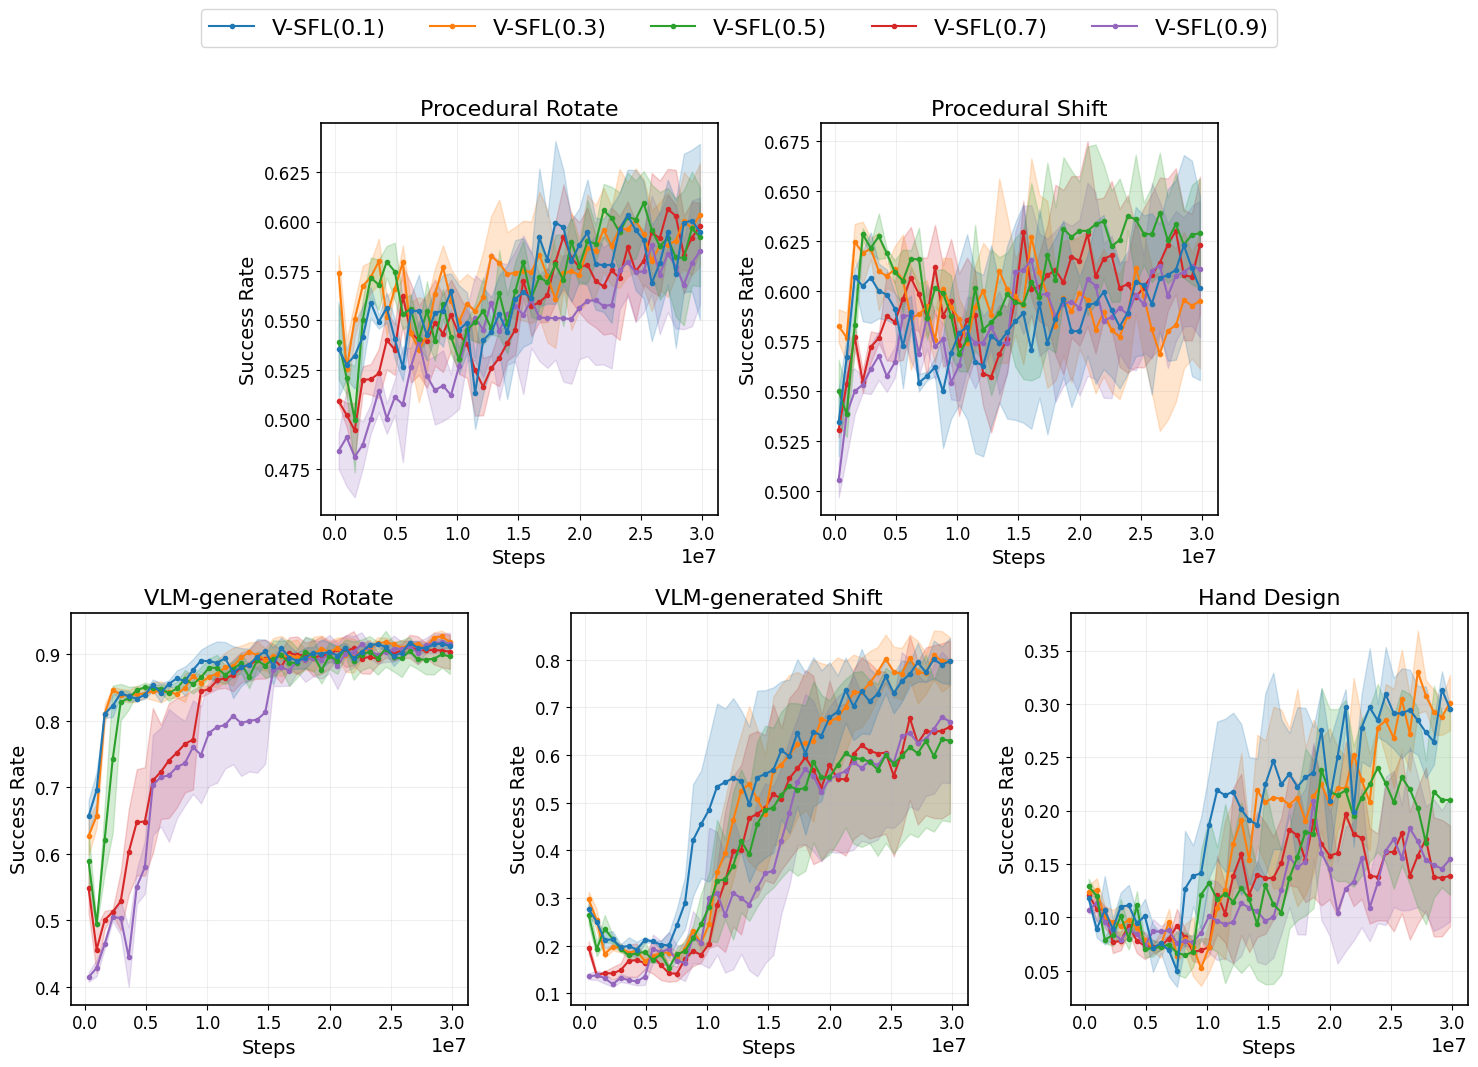

In [10]:
import matplotlib.pyplot as plt
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

method_display_config = {
    'Iphyre-V-SFL-0.1-10k': {
        'color': default_colors[0],
        'marker': 'o',
        'label': 'V-SFL(0.1)',
        'linestyle': '-',
    },
    'Iphyre-V-SFL-0.3-10k': {
        'color': default_colors[1],
        'marker': 'o',
        'label': 'V-SFL(0.3)',
        'linestyle': '-',
    },
    'Iphyre-V-SFL-0.5-10k': {
        'color': default_colors[2],
        'marker': 'o',
        'label': 'V-SFL(0.5)',
        'linestyle': '-',
    },
    'Iphyre-V-SFL-0.7-10k': {
        'color': default_colors[3],
        'marker': 'o',
        'label': 'V-SFL(0.7)',
        'linestyle': '-',
    },
    'Iphyre-V-SFL-0.9-10k': {
        'color': default_colors[4],
        'marker': 'o',
        'label': 'V-SFL(0.9)',
        'linestyle': '-',
    }
}

# Plot rotate data (test2)
methods_to_plot = method_display_config.keys()

chart_metrics = [
    ("Iphyre-HandDesign-v0/mean_success_rate", 'Hand Design'),
    ("Iphyre-ProceduralRotate-v0/mean_success_rate", "Procedural Rotate"),
    ("Iphyre-ProceduralShift-v0/mean_success_rate", "Procedural Shift"),
    ("Iphyre-VLMGeneratedRotate-v0/mean_success_rate", "VLM-generated Rotate"),
    ("Iphyre-VLMGeneratedShift-v0/mean_success_rate", "VLM-generated Shift"),
]

filename = 'alpha.png'


import matplotlib.gridspec as gridspec

# Create figure with gridspec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1])
# Create axes
ax1 = plt.subplot(gs[0, 1:3])  # Span first three columns in top row
ax2 = plt.subplot(gs[0, 3:5])  # Span last three columns in top row
ax3 = plt.subplot(gs[1, :2])  # Span first two columns in bottom row
ax4 = plt.subplot(gs[1, 2:4])  # Span middle two columns in bottom row
ax5 = plt.subplot(gs[1, 4:])  # Span last two columns in bottom row

plt.rcParams.update({'font.size': 14})  # Increase overall font size

gap = 2

for index, (method, df) in enumerate(method_dfs[chart_metrics[1][0]].items()):
    if method in methods_to_plot:
        # Sample every 5th datapoint
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[1][0], 'mean')]
        stderr = sampled_df[(chart_metrics[1][0], 'stderr')]
        ax1.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax1.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax1.set_xlabel('Steps', fontsize=14)
ax1.set_ylabel('Success Rate', fontsize=14)
ax1.set_title(chart_metrics[1][1], fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, linestyle='-', alpha=0.2)

for spine in ax1.spines.values():
    spine.set_linewidth(1.2)

# Plot shift data (test3)
for method, df in method_dfs[chart_metrics[2][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[2][0], 'mean')]
        stderr = sampled_df[(chart_metrics[2][0], 'stderr')]
        ax2.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax2.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax2.set_xlabel('Steps', fontsize=14)
ax2.set_ylabel('Success Rate', fontsize=14)
ax2.set_title(chart_metrics[2][1], fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='-', alpha=0.2)

for spine in ax2.spines.values():
    spine.set_linewidth(1.2)

# Plot test4 data
for method, df in method_dfs[chart_metrics[3][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[3][0], 'mean')]
        stderr = sampled_df[(chart_metrics[3][0], 'stderr')]
        ax3.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax3.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax3.set_xlabel('Steps', fontsize=14)
ax3.set_ylabel('Success Rate', fontsize=14)
ax3.set_title(chart_metrics[3][1], fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.grid(True, linestyle='-', alpha=0.2)

for spine in ax3.spines.values():
    spine.set_linewidth(1.2)

# Plot test5 data
for method, df in method_dfs[chart_metrics[4][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[4][0], 'mean')]
        stderr = sampled_df[(chart_metrics[4][0], 'stderr')]
        ax4.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax4.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax4.set_xlabel('Steps', fontsize=14)
ax4.set_ylabel('Success Rate', fontsize=14)
ax4.set_title(chart_metrics[4][1], fontsize=16)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.grid(True, linestyle='-', alpha=0.2)

for spine in ax4.spines.values():
    spine.set_linewidth(1.2)

# Plot test data
for method, df in method_dfs[chart_metrics[0][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[0][0], 'mean')]
        stderr = sampled_df[(chart_metrics[0][0], 'stderr')]
        ax5.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax5.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax5.set_xlabel('Steps', fontsize=14)
ax5.set_ylabel('Success Rate', fontsize=14)
ax5.set_title(chart_metrics[0][1], fontsize=16)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax5.grid(True, linestyle='-', alpha=0.2)

for spine in ax5.spines.values():
    spine.set_linewidth(1.2)

# Add legend at the top of the figure
def find_index(array, condition):
    return next((i for i, x in enumerate(array) if condition(x)), -1)

handles, labels = ax1.get_legend_handles_labels()
# Sort handles and labels by the order in method_display_config
sorted_pairs = sorted(zip(handles, labels), key=lambda x: find_index(method_display_config.items(), lambda y: y[1]['label'] == x[1]))
sorted_handles, sorted_labels = zip(*sorted_pairs)
fig.legend(sorted_handles, sorted_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)

plt.tight_layout()
if filename:
    plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()
